<a href="https://colab.research.google.com/github/Tedson2019/CapProjet/blob/main/Projet_spark_Virelala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Membres du Groupe :
    . SABRINA 
    . MARC 
    

In [1]:

!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!tar xf spark-3.0.0-bin-hadoop3.2.tgz
!pip install -q findspark



Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backpor

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

!pip install -q findspark
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [7]:
from google.colab import files
files.upload()

Saving latest_data.csv to latest_data.csv


{'latest_data.csv': b',age,sex,city,province,country,chronic_disease_binary,outcome\r\n0,38,male,Shek Lei,Hong Kong,China,False,"critical condition, intubated as of 14.02.2020"\r\n1,78,male,Vo Euganeo,Veneto,Italy,False,death\r\n2,61,female, Non_renseigner, Non_renseigner,Singapore,False,discharge\r\n113,28,male, Non_renseigner, Non_renseigner,Singapore,False,discharge\r\n224,56,female, Non_renseigner, Non_renseigner,Singapore,False,discharge\r\n335,79,female,Mei Hwan Drive, Non_renseigner,Singapore,False,discharge\r\n446,26,male, Non_renseigner, Non_renseigner,Singapore,False,discharge\r\n557,25,male,Fernvale Road, Non_renseigner,Singapore,False,discharge\r\n668,40,male,Woodlands Crescent, Non_renseigner,Singapore,False,discharge\r\n779,43,male,Lorong 8 Toa Payoh, Non_renseigner,Singapore,False,discharge\r\n890,29,male,Mei Ling Street, Non_renseigner,Singapore,False,discharge\r\n1001,71,female,National Centre for Infectious Diseases, Non_renseigner,Singapore,False,discharge\r\n1112,68

In [6]:
!ls


sample_data  spark-3.0.0-bin-hadoop3.2	spark-3.0.0-bin-hadoop3.2.tgz


Nous affichons le dataset modifié , comme précisé dans le rapport 


In [8]:
dataset = spark.read.csv('latest_data.csv',inferSchema=True,
header =True)
dataset.show()



+----+---+------+--------------------+-----------------+-----------+----------------------+--------------------+
| _c0|age|   sex|                city|         province|    country|chronic_disease_binary|             outcome|
+----+---+------+--------------------+-----------------+-----------+----------------------+--------------------+
|   0| 38|  male|            Shek Lei|        Hong Kong|      China|                 false|critical conditio...|
|   1| 78|  male|          Vo Euganeo|           Veneto|      Italy|                 false|               death|
|   2| 61|female|      Non_renseigner|   Non_renseigner|  Singapore|                 false|           discharge|
| 113| 28|  male|      Non_renseigner|   Non_renseigner|  Singapore|                 false|           discharge|
| 224| 56|female|      Non_renseigner|   Non_renseigner|  Singapore|                 false|           discharge|
| 335| 79|female|      Mei Hwan Drive|   Non_renseigner|  Singapore|                 false|     

#Question 1: Calculez  les  corrélations  entre  les  variables.  Quelles sont variables  les  plus  corrélées  avec  la  cible (‘result’)?

In [55]:
from pyspark.ml.feature import IndexToString, StringIndexer
from pyspark.ml.stat import Correlation
import pandas as pd
indexer = StringIndexer(inputCols=['city','province','country','outcome','sex'], outputCols=['cityIndex','provinceIndex','countryIndex','outcomeIndex','sexIndex'])
indexed = indexer.fit(dataset).transform(dataset)
indexed.show()

from pyspark.ml.feature import VectorAssembler
def correlation_matrix(df, corr_columns, method='pearson'):
    vector_col = "corr_features"
    assembler = VectorAssembler(inputCols=corr_columns, outputCol=vector_col)
    df_vector = assembler.transform(df).select(vector_col)
    matrix = Correlation.corr(df_vector, vector_col, method)

    result = matrix.collect()[0]["pearson({})".format(vector_col)].values
    return pd.DataFrame(result.reshape(-1, len(corr_columns)), columns=corr_columns, index=corr_columns)
correlation_matrix(indexed,['cityIndex','provinceIndex','countryIndex','outcomeIndex','age','sexIndex'],method='pearson')

### Nous avons calculé les corrélations entre les différentes variables (On peut voir la matrice de corrélation)
# On constate que les variables city  et province sont les plus corrélées avec la variable outcome  


+----+---+------+--------------------+-----------------+-----------+----------------------+--------------------+------------+-------------+---------+------------+--------+
| _c0|age|   sex|                city|         province|    country|chronic_disease_binary|             outcome|outcomeIndex|provinceIndex|cityIndex|countryIndex|sexIndex|
+----+---+------+--------------------+-----------------+-----------+----------------------+--------------------+------------+-------------+---------+------------+--------+
|   0| 38|  male|            Shek Lei|        Hong Kong|      China|                 false|critical conditio...|        19.0|         65.0|    944.0|         2.0|     0.0|
|   1| 78|  male|          Vo Euganeo|           Veneto|      Italy|                 false|               death|        10.0|        180.0|   1843.0|        18.0|     0.0|
|   2| 61|female|      Non_renseigner|   Non_renseigner|  Singapore|                 false|           discharge|         5.0|          6.0| 

On constate que les variables qui sont le plus corrélé avec la variable « outcome » sont les variables : « City », « Province », « Country » et « Age ».

**On peut supposer que la localisation et l'age sont deux grands facteurs qui peuvent influencer l'etat d'un patient .**


#Question 2 : Visualisez les données en deux dimensions en passant par l’ACP (analyse en composantes principales). Pouvez-vous utiliser une autre méthode ?

+---------+-------------+------------+------------+--------+---+--------------------+--------------------+
|cityIndex|provinceIndex|countryIndex|outcomeIndex|sexIndex|age|            features|                 pca|
+---------+-------------+------------+------------+--------+---+--------------------+--------------------+
|    944.0|         65.0|         2.0|        19.0|     0.0| 38|[944.0,65.0,2.0,1...|[-944.92044440382...|
|   1843.0|        180.0|        18.0|        10.0|     0.0| 78|[1843.0,180.0,18....|[-1845.7194277387...|
|     16.0|          6.0|         4.0|         5.0|     1.0| 61|[16.0,6.0,4.0,5.0...|[-15.960517713659...|
|     16.0|          6.0|         4.0|         5.0|     0.0| 28|[16.0,6.0,4.0,5.0...|[-16.042053705174...|
|     16.0|          6.0|         4.0|         5.0|     1.0| 56|[16.0,6.0,4.0,5.0...|[-15.972851592170...|
|    848.0|          6.0|         4.0|         5.0|     1.0| 79|[848.0,6.0,4.0,5....|[-847.78294656406...|
|     16.0|          6.0|         4.0

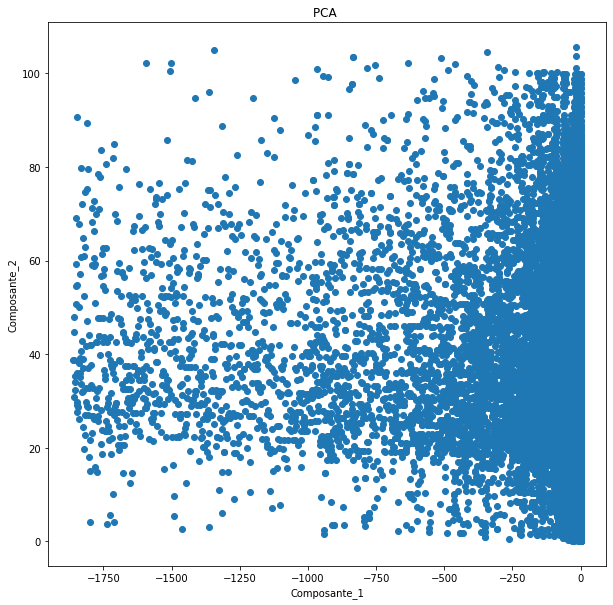

38115


In [80]:
dataset = indexed[['cityIndex','provinceIndex','countryIndex','outcomeIndex','sexIndex','age']]
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import PCA
import matplotlib.pyplot as plt
import numpy as np

assembler = VectorAssembler(inputCols=['cityIndex','provinceIndex','countryIndex','outcomeIndex','sexIndex','age'], outputCol = 'features')
output = assembler.transform(dataset)

###On créé notre PCA 
pca = PCA(k=2, inputCol='features', outputCol="pca")
pca_model = pca.fit(output)
model = pca_model.transform(output)
model.show()
# Représentation du model
pca = model.rdd.map(lambda row: row.pca).collect()
pca = np.array(pca)
pca_abcisse = []
pca_ordonne = []
for i in pca:
  pca_abcisse.append(i[0])
  pca_ordonne.append(i[1])
plt.figure(figsize = (10,10))
plt.scatter(pca_abcisse, pca_ordonne)
plt.title("PCA ")
plt.xlabel("Composante_1")
plt.ylabel("Composante_2")
plt.show()
print(len(pca_ordonne
          ))



In [ ]:
dataset = indexed[['cityIndex','provinceIndex','countryIndex','outcomeIndex','sexIndex','age']]

Nous pouvons utiliser une autre méthode de réduction de dimension .
On peut utiliser la décomposition en valeur singulière (SVD ) ou encore l'analyse factorielle discriminante (AVD).

#Question 3  prédire la classe : les patients sont soit «décédés» (‘died’) soit «sortis» (‘discharged’) de l'hôpital. Vous pouvez utiliser la classification par K-Nearest Neighbours (K-NN),

In [ ]:
#Importation des modules
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler

#Division du  dataset , 70% pour les données d'entrainement et 30% pour ceux de test
dividedData = dataset.randomSplit([0.7, 0.3]) 
trainingData = dividedData[0] #index 0 = dataset d'entrainement
testingData = dividedData[1] #index 1 = dataset de test
train_rows = trainingData.count()
test_rows = testingData.count()
print ("Training data rows:", train_rows, "; Testing data rows:", test_rows)

#Preparation du Dataset
#Nous allons créer un vecteur  feature 
# Nous aurons trois grandes classes (mort , discharger , hospitalizé)
assembler = VectorAssembler(inputCols = [
  'cityIndex','provinceIndex','countryIndex','sexIndex','age'], outputCol="features")
trainingDataFinal = assembler.transform(
    trainingData).select(col("features"), col("outcomeIndex").alias("label"))
trainingDataFinal.show(truncate=False, n=3)

# Nous avons choisis la regression logistique qui est une technique de classification 
classifier = LogisticRegression(
    labelCol="label",featuresCol="features",maxIter=10,regParam=0.3)
#Entrainement 
model = classifier.fit(trainingDataFinal)
print ("Classifier model is trained!")

###Données d'entrainement 
testingDataFinal = assembler.transform(
    testingData).select(col("features"), col("outcomeIndex").alias("trueLabel"))
testingDataFinal.show(20)

### Prédiction du model 
prediction = model.transform(testingDataFinal)
predictionFinal = prediction.select(
    "features", "prediction", "probability", "trueLabel")
predictionFinal.show(truncate=False, n=3)
prediction.show(truncate=False, n=3)

### Calcul des performances du model 
correctPrediction = predictionFinal.filter(
    predictionFinal['prediction'] == predictionFinal['trueLabel']).count()
totalData = predictionFinal.count()
print("correct prediction:", correctPrediction, ", total data:", totalData, 
      ", accuracy:", correctPrediction/totalData)


Training data rows: 26743 ; Testing data rows: 11372
+---------+-----+
|features |label|
+---------+-----+
|(5,[],[])|0.0  |
|(5,[],[])|0.0  |
|(5,[],[])|0.0  |
+---------+-----+
only showing top 3 rows

Classifier model is trained!
+-------------+---------+
|     features|trueLabel|
+-------------+---------+
|    (5,[],[])|      0.0|
|    (5,[],[])|      0.0|
|(5,[4],[1.0])|      0.0|
|(5,[4],[1.0])|      0.0|
|(5,[4],[1.0])|      0.0|
|(5,[4],[1.0])|      0.0|
|(5,[4],[1.0])|      0.0|
|(5,[4],[1.0])|      0.0|
|(5,[4],[1.0])|      0.0|
|(5,[4],[1.0])|      0.0|
|(5,[4],[1.0])|      0.0|
|(5,[4],[2.0])|      0.0|
|(5,[4],[2.0])|      0.0|
|(5,[4],[2.0])|      0.0|
|(5,[4],[2.0])|      0.0|
|(5,[4],[2.0])|      0.0|
|(5,[4],[2.0])|      0.0|
|(5,[4],[2.0])|      0.0|
|(5,[4],[2.0])|      0.0|
|(5,[4],[3.0])|      0.0|
+-------------+---------+
only showing top 20 rows

+-------------+----------+-------------------------------------------------------------------------------------------

On peut conclure que les prédictions obtenues sont satisfaisantes. En effet, l'ensemble des métriques obtenues sont égaux à 81 %, ce qui indique une bonne classification  .

#Question 4 : Utilisez la régression pour prédire l'âge (age) des personnes en fonction d'autres variables. Vous avez le choix sur ces variables explicatives ? Comment choisissez-vous ces variables ? Calculez la qualité de la prédiction à l'aide de l'erreur MSE (Mean Squared Error).

In [ ]:



####4. Utilisez la régression pour prédire l'âge (age) des personnes en fonction d'autres variables. Vous avez le
#choix sur ces variables explicatives ? Comment choisissez-vous ces variables ? Calculez la qualité de la
#prédiction à l'aide de l'erreur MSE (Mean Squared Error).


###Pour prédire l’âge en utilisant la régression linéaire, nous avons fait le choix d’utiliser les variables qui sont le plus corrélés avec l’âge.
#Le choix des variables s’est donc fait grâce à la matrice de corrélation représenté la question 1 .

###les variables que nous avons choisis sont : : « sex » , « outcome »,  « country », « city »

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

assembler = VectorAssembler(inputCols=['cityIndex','countryIndex','outcomeIndex','sexIndex'], outputCol = 'Attributes')

output = assembler.transform(indexed)
data_final = output.select("Attributes","age")
data_final.show()

train_data,test_data = data_final.randomSplit([0.8,0.2])
regressor = LinearRegression(featuresCol = 'Attributes',labelCol = 'age')
regressor = regressor.fit(train_data)
pred = regressor.evaluate(test_data)
pred.predictions.show()
coeff = regressor.coefficients
#X and Y intercept
intr = regressor.intercept
print("The coefficient of the model is : %a" %coeff)
print("The intercept of the model is : %f" %intr)

### evaluons la qualité du modèle en calculant l'erreur MSE
from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator(labelCol="age", predictionCol="prediction", metricName="rmse")
mse = eval.evaluate(pred.predictions, {eval.metricName: "mse"})
print("MSE: %.3f" % mse)

+--------------------+---+
|          Attributes|age|
+--------------------+---+
|[944.0,2.0,19.0,0.0]| 38|
|[1843.0,18.0,10.0...| 78|
|  [16.0,4.0,5.0,1.0]| 61|
|  [16.0,4.0,5.0,0.0]| 28|
|  [16.0,4.0,5.0,1.0]| 56|
| [848.0,4.0,5.0,1.0]| 79|
|  [16.0,4.0,5.0,0.0]| 26|
| [739.0,4.0,5.0,0.0]| 25|
| [980.0,4.0,5.0,0.0]| 40|
| [825.0,4.0,5.0,0.0]| 43|
| [849.0,4.0,5.0,0.0]| 29|
|  [74.0,4.0,5.0,1.0]| 71|
|[1173.0,18.0,10.0...| 68|
| [350.0,4.0,5.0,0.0]|  1|
|  [74.0,4.0,5.0,0.0]| 35|
| [452.0,8.0,5.0,0.0]| 36|
|  [74.0,4.0,5.0,0.0]| 32|
| [774.0,4.0,5.0,1.0]| 30|
|  [74.0,4.0,5.0,0.0]| 41|
|  [74.0,4.0,5.0,1.0]| 58|
+--------------------+---+
only showing top 20 rows

+----------+---+-----------------+
|Attributes|age|       prediction|
+----------+---+-----------------+
| (4,[],[])|  0|39.90953544065753|
| (4,[],[])|  0|39.90953544065753|
| (4,[],[])|  0|39.90953544065753|
| (4,[],[])|  1|39.90953544065753|
| (4,[],[])|  1|39.90953544065753|
| (4,[],[])|  1|39.90953544065753|
| (4,[],[])

#Question5 : Appliquer trois méthodes de clustering (K-means, NMF et CAH) sur l'ensemble de données pour segmenter les personnes en différents groupes. Utilisez l'index de Silhouette pour connaître le meilleur


On trouve pour k = 5 la silouette vaut 0,7

In [77]:
####Question5 : Appliquer trois méthodes de clustering (K-means, NMF et CAH) sur l'ensemble de données pour
###segmenter les personnes en différents groupes. Utilisez l'index de Silhouette pour connaître le meilleur
##nombre de clusters.

from pyspark.ml.clustering import KMeans
from sklearn.decomposition import NMF
from sklearn.cluster import AgglomerativeClustering
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import ClusteringEvaluator
from sklearn.metrics import silhouette_score

###Methode 1 KMEANS
###Nous allons différencier les groupes selon qu'ils sont mort ou pas avec la methode KMeans
###preparation des données 

#dataset = indexed[['cityIndex','provinceIndex','countryIndex','symptomsIndex','date_confirmationIndex','sexIndex','age']]
#define assembler

assembler = VectorAssembler(inputCols=['cityIndex','countryIndex','age','sexIndex'], outputCol = 'features')

output = assembler.transform(indexed)
data = output.select("features","outcomeIndex")
data.show()

###Creation du modèle KMeans

#define kMeans clustering algorithm
Tab_Si = []
for i in range(2,50):
  kmeans = KMeans(
    featuresCol=assembler.getOutputCol(), 
    predictionCol="cluster", k=3)
  model = kmeans.fit(data)
  predictions = model.transform(data)
  evaluator = ClusteringEvaluator(predictionCol="outcomeIndex",featuresCol = "features")
  sil = evaluator.evaluate(predictions)
  Tab_Si.append([sil,i])
  
  print("k" + str(Tab_Si[0][1]) )

#Montre le centre de chaque cluster
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)
## Cluster du dataframe

prediction = model.transform(data)#cluster given data
prediction.groupBy("cluster").count().orderBy("cluster").show()#count members in each cluster
prediction.select('outcomeIndex', 'cluster').show(2)#show several clustered data





+--------------------+------------+
|            features|outcomeIndex|
+--------------------+------------+
|[944.0,2.0,38.0,0.0]|        19.0|
|[1843.0,18.0,78.0...|        10.0|
| [16.0,4.0,61.0,1.0]|         5.0|
| [16.0,4.0,28.0,0.0]|         5.0|
| [16.0,4.0,56.0,1.0]|         5.0|
|[848.0,4.0,79.0,1.0]|         5.0|
| [16.0,4.0,26.0,0.0]|         5.0|
|[739.0,4.0,25.0,0.0]|         5.0|
|[980.0,4.0,40.0,0.0]|         5.0|
|[825.0,4.0,43.0,0.0]|         5.0|
|[849.0,4.0,29.0,0.0]|         5.0|
| [74.0,4.0,71.0,1.0]|         5.0|
|[1173.0,18.0,68.0...|        10.0|
| [350.0,4.0,1.0,0.0]|         5.0|
| [74.0,4.0,35.0,0.0]|         5.0|
|[452.0,8.0,36.0,0.0]|         5.0|
| [74.0,4.0,32.0,0.0]|         5.0|
|[774.0,4.0,30.0,1.0]|         5.0|
| [74.0,4.0,41.0,0.0]|         5.0|
| [74.0,4.0,58.0,1.0]|         5.0|
+--------------------+------------+
only showing top 20 rows

k2
k2
k2
k2
k2
k2
k2
k2
k2
k2
k2
k2
k2
k2
k2
k2
k2
k2
k2
k2
k2
k2
k2
k2
k2
k2
k2
k2
k2
k2
k2
k2
k2
k2
k2
k2
k2

In [67]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd 
y = np.array(indexed.select("outcomeIndex").collect())
X = np.array(indexed.select("age","sexIndex","cityIndex","provinceIndex","countryIndex").collect())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

CAH 

In [ ]:
#CAH
from sklearn.cluster import AgglomerativeClustering
from operator import itemgetter
from pyspark.ml.evaluation import ClusteringEvaluator
from sklearn.metrics import silhouette_score
import numpy as np
Tab_sil = []
for K in range(2,10):
  cah = AgglomerativeClustering(n_clusters = K)
  predictions = cah.fit_predict(X_train)
  silhouette = silhouette_score(X_train, predictions)
  Tab_sil.append([silhouette, K])
Tab_sil = list(sorted(Tab_sil, key=itemgetter(0), reverse = True))
print(" Bonne silhouette =  "+ str(Tab_sil[0][0]) + " pour k = " + str(Tab_sil[0][1]))

NMF

In [69]:
from sklearn.decomposition import NMF
Tab_sil = []
for K in range(2,50):
  nmf = NMF(n_components = i)
  model = nmf.fit(X_train)
  predictions = model.transform(X_train)
  predictions = np.argmax(predictions, axis=-1)
  silhouette = silhouette_score(X_train, predictions)
  Tab_sil.append([silhouette, K])
Tab_sil = list(sorted(Tab_sil, key=itemgetter(0), reverse = True))
print(" Bonne silhouette =  "+ str(Tab_sil[0][0]) + " pour k = " + str(Tab_sil[0][1]))


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr

 Bonne silhouette =  0.5145078268037298 pour k = 33


In [73]:
print(K)

49


#Question 6 : Visualisez les résultats pour analyser visuellement la structure de clustering des trois méthodes.

Nous n'avons que analyser visuellement  que la structure de clustering du CAH

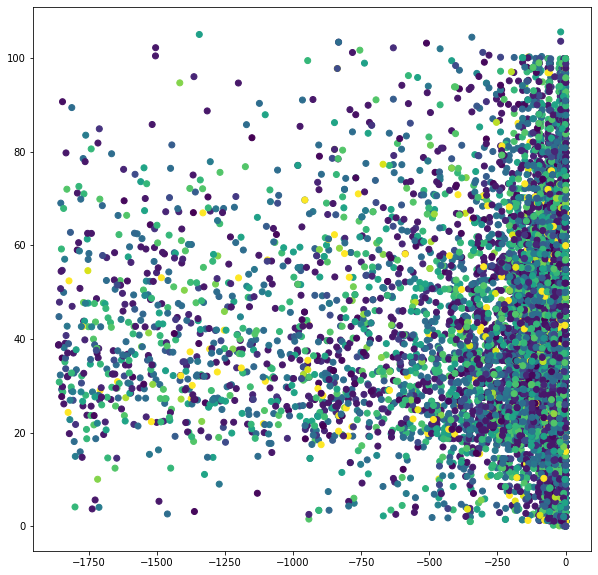

In [83]:
from sklearn.cluster import AgglomerativeClustering
from operator import itemgetter
from pyspark.ml.evaluation import ClusteringEvaluator
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt


cah = AgglomerativeClustering(n_clusters = K)
predictions = cah.fit_predict(X_train)
plt.figure(figsize = (10,10))


plt.scatter(pca_abcisse[: 25537],pca_ordonne[: 25537], c = predictions)


#Question 7 : Les données sont déséquilibrées. Vous pouvez les équilibrer en réduisant aléatoirement la classe majoritaire. Supposons que vous extrayez aléatoirement des échantillons équilibrés. Comment les résultats de la prédiction changeront-ils?

Si on prélève aléatoirement les échantillons équilibrés , nous aurons de meilleurs résultats . En effet , notre système a tendance à donner le meme désiquilibre lors des prédictions . Si les échantillons sont équilibrés , il n'y aura pas de classe majoritaire dans notre dataset d'entrainement , il est fort probable qu'on ait de bons résultats . Cependant , tout dépendra aussi des données sur lesquels on applique notre modèle. Car s'ils ils sont déséquilibrés cela peut augmenter le cout de la classe majoritaire .

#Question 8 : Comment pouvez-vous mieux gérer ce déséquilibre entre les classes ?

Pour mieux gérer ce déséquilibre , nous pouvons :
    - Diminuer le nombre d'individus de la classe majoritaire au détriment de la minoritaire (Cependant nous risquons une grosse perte de données , ce qui rendra les prédictions moins éfficaces )
    - Augmenter le poids de la classe minoritaire , ou lui rajouter des individus en utilisant les techniques de classification (ce qui peut poser problème car nous les aurons créer  ) 

#Question 9 : Pour trouver les meilleurs paramètres pour les modèles, quel algorithme pouvez-vous utiliser. Expliquez l'algorithme.

#Question 10 : Présentez et expliquez l’avantage d’utiliser Spark par rapport à aux techniques classiques dans ce contexte.

Spark nous a permis un traitement rapide et fluide des données . Il est à noter que le dataset fournit avait 2 millions de lignes . Un outils classique nous aurait pris plus de temps de calcul . 
